Aim: To build an ANN (Artificial Nueral Network) model for performing classification on a given dataset.

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split

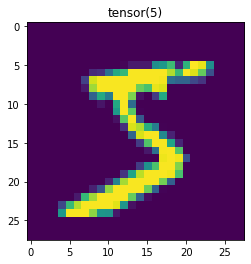

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features = 784
x_train, x_test = x_train.reshape([-1,num_features]), x_test.reshape([-1,num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

#create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
x_train_torch = torch.from_numpy(x_train)
y_train_torch = torch.from_numpy(y_train).type(torch.LongTensor) #data type as long


#create feature and targets tensor for train set.
x_test_torch = torch.from_numpy(x_test)
y_test_torch = torch.from_numpy(y_test).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train_torch,y_train_torch)
test = torch.utils.data.TensorDataset(x_test_torch,y_test_torch)

# Data loader
train_loader = DataLoader(train, batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False)

# visualize one of the images in data set
plt.imshow(x_train_torch[0].reshape(28,28))
plt.title(str(y_train_torch[0]))
plt.show()

In [4]:
#Create ANN Model
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()
    self.linear1 = nn.Linear(input_dim,hidden_dim)
    self.linear2 = nn.Linear(hidden_dim,output_dim)

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x


# instantiate ANN
input_dim = 28*28 #number of variables in dataset
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10 #number of classes

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim) #classifier model

print(model.parameters)

#Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<bound method Module.parameters of ANNModel(
  (linear1): Linear(in_features=784, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=10, bias=True)
)>


In [5]:
 # ANN model training

count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    # Clear gradients
    optimizer.zero_grad()
    
    # Forward propagation
    output = model(train)

    # Calculate softmax and cross entropy loss
    loss = error(output,labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1
    if count % 50 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))

        # Forward propagation
        output = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(output.data,1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()
        
      accuracy = 100 * correct / float(total)
      
      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
      # Print Loss
      print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data,accuracy))


Iteration: 500 Loss: 1.9504092931747437 Accuracy: 65.91999816894531 %
Iteration: 1000 Loss: 1.3277888298034668 Accuracy: 77.47000122070312 %
Iteration: 1500 Loss: 1.0536108016967773 Accuracy: 82.58000183105469 %
Iteration: 2000 Loss: 0.7371545433998108 Accuracy: 85.12000274658203 %
Iteration: 2500 Loss: 0.48739802837371826 Accuracy: 86.5 %
Iteration: 3000 Loss: 0.5802332162857056 Accuracy: 87.43000030517578 %
Iteration: 3500 Loss: 0.5629478693008423 Accuracy: 88.22000122070312 %
Iteration: 4000 Loss: 0.5337113738059998 Accuracy: 88.77999877929688 %
Iteration: 4500 Loss: 0.6435396075248718 Accuracy: 89.27999877929688 %


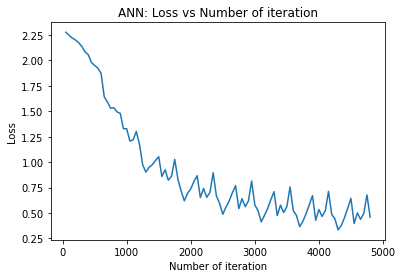

In [6]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()


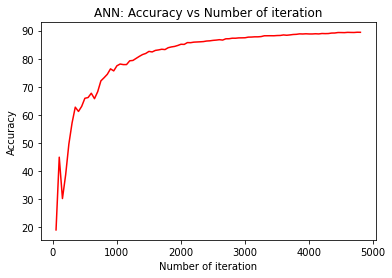

In [7]:
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()